In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd



In [3]:
xls_file = pd.ExcelFile('../data/raw/Data_Tables_LGA_Recorded_Offences_Year_Ending_March_2022.xlsx')

df1 = pd.read_excel(xls_file, 'Table 03') #with postcode

Show Details of the Data 

In [4]:
df1.head()

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Offence Count
0,2022,March,Alpine,3691,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,2
1,2022,March,Alpine,3691,Dederang,B Property and deception offences,B30 Burglary/Break and enter,B321 Residential non-aggravated burglary,1
2,2022,March,Alpine,3691,Dederang,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,1
3,2022,March,Alpine,3691,Dederang,D Public order and security offences,D20 Disorderly and offensive conduct,D22 Drunk and disorderly in public,1
4,2022,March,Alpine,3691,Kergunyah South,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,1


In [5]:
df1.shape

(354716, 9)

In [6]:
df1.columns


Index(['Year', 'Year ending', 'Local Government Area', 'Postcode',
       'Suburb/Town Name', 'Offence Division', 'Offence Subdivision',
       'Offence Subgroup', 'Offence Count'],
      dtype='object')

In [7]:
df1['Year'].value_counts().sort_index()

2013    31526
2014    33191
2015    33652
2016    35733
2017    36504
2018    35726
2019    36664
2020    36739
2021    38239
2022    36742
Name: Year, dtype: int64

In [8]:
df1['Offence Division'].value_counts().sort_index()

A Crimes against the person              97514
B Property and deception offences       140058
C Drug offences                          25398
D Public order and security offences     45209
E Justice procedures offences            37955
F Other offences                          8582
Name: Offence Division, dtype: int64

In [9]:
LGAs = df1['Local Government Area'].unique()

In [10]:
LGAs

array(['Alpine', 'Ararat', 'Ballarat', 'Banyule', 'Bass Coast', 'Baw Baw',
       'Bayside', 'Benalla', 'Boroondara', 'Brimbank', 'Buloke',
       'Campaspe', 'Cardinia', 'Casey', 'Central Goldfields',
       'Colac-Otway', 'Corangamite', 'Darebin', 'East Gippsland',
       'Frankston', 'Gannawarra', 'Glen Eira', 'Glenelg', 'Golden Plains',
       'Greater Bendigo', 'Greater Dandenong', 'Greater Geelong',
       'Greater Shepparton', 'Hepburn', 'Hindmarsh', 'Hobsons Bay',
       'Horsham', 'Hume', 'Indigo', 'Kingston', 'Knox', 'Latrobe',
       'Loddon', 'Macedon Ranges', 'Manningham', 'Mansfield',
       'Maribyrnong', 'Maroondah', 'Melbourne', 'Melton', 'Mildura',
       'Mitchell', 'Moira', 'Monash', 'Moonee Valley', 'Moorabool',
       'Moreland', 'Mornington Peninsula', 'Mount Alexander', 'Moyne',
       'Murrindindi', 'Nillumbik', 'Northern Grampians', 'Port Phillip',
       'Pyrenees', 'Queenscliffe', 'South Gippsland',
       'Southern Grampians', 'Stonnington', 'Strathbogie', 

Printing values from columns to ensure there are no strange looking values

In [11]:
for suburb in df1['Suburb/Town Name'].unique():
    print(suburb)

Dederang
Kergunyah South
Mongans Bridge
Upper Gundowring
Tawonga
Tawonga South
Mount Beauty
Barwidgee
Buffalo River
Dandongadale
Gapsted
Merriang
Mudgegonga
Myrtleford
Nug Nug
Wonnangatta
Ovens
Eurobin
Buckland
Mount Buffalo
Porepunkah
Bright
Harrietville
Smoko
Wandiligong
Dinner Plain
Lake Bolac
Mininera
Streatham
Ballyrogan
Buangor
Middle Creek
Ararat
Armstrong
Cathcart
Crowlands
Denicull Creek
Dobie
Maroona
Mount Cole
Moyston
Norval
Rhymney
Warrak
Tatyoon
Mafeking
Wickliffe
Willaura
Willaura North
Black Range
Pomonal
Elmhurst
Glenlogie
Alfredton
Bakery Hill
Ballarat Central
Ballarat East
Ballarat North
Black Hill
Brown Hill
Canadian
Eureka
Golden Point
Invermay Park
Lake Wendouree
Lucas
Mount Clear
Mount Helen
Mount Pleasant
Nerrina
Newington
Redan
Soldiers Hill
Bo Peep
Smythes Creek
Blowhard
Bonshaw
Bunkers Hill
Burrumbeet
Cardigan
Cardigan Village
Chapel Flat
Durham Lead
Glen Park
Gong Gong
Invermay
Learmonth
Magpie
Miners Rest
Mount Rowan
Scotsburn
Sulky
Warrenheip
Waubra
Weather

In [12]:
for postcode in df1['Postcode'].unique():
    print(postcode)

3691
3697
3698
3699
3737
3738
3739
3740
3741
3744
3898
3351
3375
3377
3378
3379
3381
3469
3350
3352
3355
3356
3357
3358
3363
3364
3079
3081
3083
3084
3085
3087
3088
3093
3094
3095
3922
3923
3925
3945
3951
3979
3984
3990
3991
3992
3995
3996
3816
3818
3820
3821
3822
3823
3824
3825
3831
3832
3833
3835
3871
3950
3988
3186
3187
3188
3190
3191
3192
3193
3670
3672
3673
3675
3725
3726
3101
3102
3103
3104
3122
3123
3124
3126
3127
3146
3147
3012
3020
3021
3022
3023
3026
3033
3036
3037
3038
3042
3043
3477
3478
3480
3482
3483
3525
3527
3529
3530
3531
3533
3523
3551
3557
3558
3559
3561
3562
3563
3564
3566
3572
3573
3612
3620
3621
3622
3623
3624
3159
3781
3782
3783
3807
3808
3809
3810
3812
3813
3814
3815
3978
3981
3987
3156
3177
3802
3803
3804
3805
3806
3912
3975
3976
3977
3980
3371
3464
3465
3472
3475
3233
3234
3236
3237
3238
3239
3241
3242
3243
3249
3250
3251
3254
3260
3266
3321
3322
3264
3265
3267
3268
3269
3270
3271
3323
3324
3325
3361
3070
3071
3072
3073
3078
3864
3865
3875
3878
3880
3882
3885


Map suburbs with SA2 codes


In [13]:
#read in suburbs shapefiles

property_data = pd.read_csv("../data/raw/full_property_zones.csv")

In [14]:
property_data.head()

,Unnamed: 0,index,name,cost_text,Bed,Bath,Park,property_type,desc_head,LocID
0,0,https://www.domain.com.au/3502-14-16-the-espla...,3502/14-16 The Esplanade St Kilda VIC 3182,5000.0,1,1,1,Apartment / Unit / Flat,noth els compar,206051514
1,1,https://www.domain.com.au/4203-35-spring-stree...,4203/35 Spring Street Melbourne VIC 3000,4500.0,3,2,2,Apartment / Unit / Flat,arguabl captiv penthous,206041503
2,2,https://www.domain.com.au/901-902-85-market-st...,901 & 902/85 Market Street South Melbourne VIC...,3750.0,2,2,1,Apartment / Unit / Flat,call exclus penthous short stay minimum week stay,206051512
3,3,https://www.domain.com.au/hawthorn-east-vic-31...,Hawthorn East VIC 3123,3750.0,4,2,3,House,luxuri finest month leas avail unfurnish fulli...,207011152
4,4,https://www.domain.com.au/50-south-wharf-drive...,50 South Wharf Drive Docklands VIC 3008,3750.0,2,2,1,Townhouse,luxuri style space,206041118


In [15]:
property_data['Postcodes'] = property_data['name'].str.split(" ").str[-1]

In [16]:
postcodes_sa2_df = property_data[['LocID', 'Postcodes']]

In [17]:
df1['Postcode'] = df1['Postcode'].astype('str')

In [18]:
df1.dtypes

Year                      int64
Year ending              object
Local Government Area    object
Postcode                 object
Suburb/Town Name         object
Offence Division         object
Offence Subdivision      object
Offence Subgroup         object
Offence Count             int64
dtype: object

In [19]:
mapping = dict(property_data[['Postcodes', 'LocID']].values)


In [20]:
mapping

{'3182': 206051514,
 '3000': 206041504,
 '3205': 206051511,
 '3123': 207011152,
 '3008': 206041118,
 '3144': 208041194,
 '3122': 207011519,
 '3101': 207011522,
 '3186': 208011169,
 '3145': 208041195,
 '3015': 213021344,
 '3188': 208011172,
 '3053': 206041117,
 '3121': 206071518,
 '3124': 207011149,
 '3142': 206061138,
 '3184': 206051129,
 '3193': 208011168,
 '3103': 207011147,
 '3143': 206061135,
 '3191': 208011173,
 '3162': 208021178,
 '3199': 214011371,
 '3065': 206071142,
 '3141': 206061515,
 '3187': 208011170,
 '3006': 206041509,
 '3206': 206051128,
 '3002': 206041119,
 '3181': 206061136,
 '3183': 206051134,
 '3207': 206051130,
 '3126': 207011155,
 '3032': 213031349,
 '3003': 206041510,
 '3104': 207011148,
 '3102': 207011154,
 '3204': 208021182,
 '3146': 208041194,
 '3051': 206041506,
 '3066': 206071141,
 '3127': 207031167,
 '3052': 206011107,
 '3057': 206011106,
 '3068': 206071143,
 '3070': 206021500,
 '3185': 208021179,
 '3056': 206011495,
 '3161': 208021177,
 '3072': 209021428,


In [21]:
df1['SA2_codes'] = df1.Postcode.map(mapping)


In [24]:
df1['SA2_codes'].isna().sum()

204164

In [28]:
df1.dtypes

Year                       int64
Year ending               object
Local Government Area     object
Postcode                  object
Suburb/Town Name          object
Offence Division          object
Offence Subdivision       object
Offence Subgroup          object
Offence Count              int64
SA2_codes                float64
dtype: object

In [33]:
df1['SA2_codes'] = ((df1['SA2_codes']*1000).astype("Int64").astype(float))/1000


In [32]:
df1.dtypes

Year                       int64
Year ending               object
Local Government Area     object
Postcode                  object
Suburb/Town Name          object
Offence Division          object
Offence Subdivision       object
Offence Subgroup          object
Offence Count              int64
SA2_codes                float64
dtype: object

In [ ]:
#204164 postcode values had a corresponding SA2 code
#question - do i find the rest or are we only looking at postcodes within the property data csv 

Boxplot for offence count outlier visualisation

In [156]:
df1_2021 = df1[df1["Year"]==2021]


In [157]:
#get top 20 suburbs with highest offence count in 2021 to sample for boxplot visualisation
n = 20
df1_2021.groupby(['Suburb/Town Name'])['Offence Count'].sum().nlargest(n)

Suburb/Town Name
Melbourne      10670
Frankston       4090
Reservoir       3945
Preston         3044
Werribee        3017
Dandenong       2850
Richmond        2749
St Kilda        2536
St Albans       2430
Pakenham        2408
South Yarra     2296
Epping          2269
Mildura         2267
Traralgon       2167
Craigieburn     1994
Cranbourne      1815
Noble Park      1728
Docklands       1718
Ringwood        1668
Shepparton      1607
Name: Offence Count, dtype: int64

In [158]:
#filtered suburbs by top 20

top_20_suburbs = ['Melbourne', 'Frankston', 'Reservoir', 'Preston', 'Werribee', 'Dandenong', 'Richmond', 'St Kilda', 
                 'St Albans', 'Pakenham', 'South Yarra', 'Epping', 'Mildura', 'Traralgon', 'Craigieburn', 'Cranbourne',
                  'Noble Park', 'Docklands', 'Ringwood', 'Shepparton']

df1_2021_filtered_top_20 = df1_2021[df1_2021['Suburb/Town Name'].isin(top_20_suburbs)]

In [159]:
df1_2021_filtered_top_20

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Offence Count
41594,2021,March,Brimbank,3021,St Albans,B Property and deception offences,B20 Property damage,B21 Criminal damage,261
41601,2021,March,Brimbank,3021,St Albans,B Property and deception offences,B40 Theft,B42 Steal from a motor vehicle,470
41604,2021,March,Brimbank,3021,St Albans,B Property and deception offences,B40 Theft,B45 Receiving or handling stolen goods,206
41605,2021,March,Brimbank,3021,St Albans,B Property and deception offences,B40 Theft,B49 Other theft,246
41617,2021,March,Brimbank,3021,St Albans,C Drug offences,C30 Drug use and possession,C32 Drug possession,350
...,...,...,...,...,...,...,...,...,...
73578,2021,March,Yarra,3121,Richmond,B Property and deception offences,B40 Theft,B45 Receiving or handling stolen goods,212
73580,2021,March,Yarra,3121,Richmond,B Property and deception offences,B40 Theft,B49 Other theft,346
73582,2021,March,Yarra,3121,Richmond,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,309
73588,2021,March,Yarra,3121,Richmond,C Drug offences,C30 Drug use and possession,C32 Drug possession,468


<AxesSubplot:title={'center':'Offence Count'}, xlabel='Suburb/Town Name'>

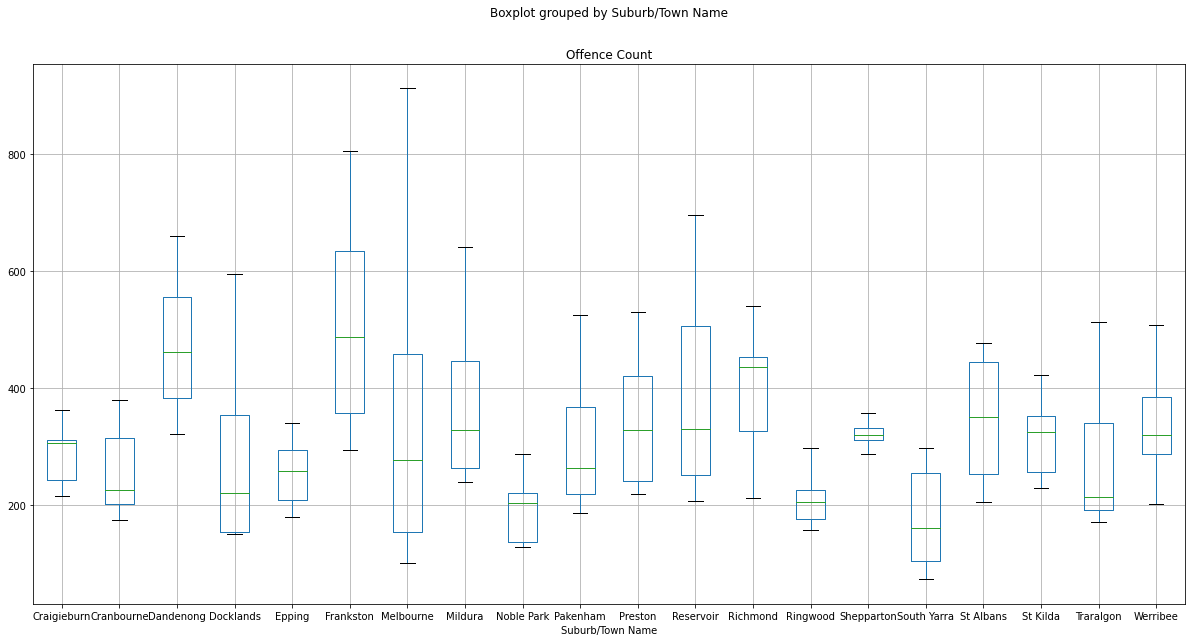

In [160]:
fig, ax = plt.subplots(figsize=(20, 10))


df1_2021_filtered_top_20.boxplot(column=['Offence Count'], by='Suburb/Town Name', ax=ax)

In [162]:
#we see some outliers here, we will remove them per year and per suburb

In [163]:
def outliers_iqr(column):
    quartile_1, quartile_3 = np.percentile(column, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return (column> upper_bound) | (column< lower_bound)

In [167]:
#remove offence count outliers outliers based on each Year and Suburb Name 

df1_outliers_removed = df1[~df1.groupby(['Year', 'Suburb/Town Name'])['Offence Count'].apply(outliers_iqr)]

In [135]:
df1.groupby(['Year', 'Suburb/Town Name'])

In [173]:
df1_outliers_removed.shape

(33523, 9)

In [97]:
groups_of_crime_by_year = df1.groupby(['Year'])['Offence Division'].value_counts().sort_index()


In [98]:
groups_of_crime_by_year = groups_of_crime_by_year.to_frame()

In [99]:
groups_of_crime_by_year

Offence Division
Year Offence Division                                      
2013 A Crimes against the person                       8461
     B Property and deception offences                13302
     C Drug offences                                   2237
     D Public order and security offences              4217
     E Justice procedures offences                     2544
     F Other offences                                   765
2014 A Crimes against the person                       8858
     B Property and deception offences                13606
     C Drug offences                                   2497
     D Public order and security offences              4551
     E Justice procedures offences                     2951
     F Other offences                                   728
2015 A Crimes against the person                       9048
     B Property and deception offences                13448
     C Drug offences                                   2550
     D Public order and security offences              4504
     E Justice procedures offences                     3341
     F Other offences                                   761
2016 A Crimes against the person                       9553
     B Property and deception offences                14264
     C Drug offences                                   2620
     D Public order and security offences              4763
     E Justice procedures offences                     3751
     F Other offences                                   782
2017 A Crimes against the person                      10075
     B Property and deception offences                14417
     C Drug offences                                   2657
     D Public order and security offences              4651
     E Justice procedures offences                     4034
     F Other offences                                   670
2018 A Crimes against the person                      10024
     B Property and deception offences                14089
     C Drug offences                                   2458
     D Public order and security offences              4537
     E Justice procedures offences                     3944
     F Other offences                                   674
2019 A Crimes against the person                      10237
     B Property and deception offences                14472
     C Drug offences                                   2558
     D Public order and security offences              4584
     E Justice procedures offences                     4095
     F Other offences                                   718
2020 A Crimes against the person                      10151
     B Property and deception offences                14651
     C Drug offences                                   2577
     D Public order and security offences              4462
     E Justice procedures offences                     4270
     F Other offences                                   628
2021 A Crimes against the person                      10616
     B Property and deception offences                14044
     C Drug offences                                   2794
     D Public order and security offences              4614
     E Justice procedures offences                     4597
     F Other offences                                  1574
2022 A Crimes against the person                      10491
     B Property and deception offences                13765
     C Drug offences                                   2450
     D Public order and security offences              4326
     E Justice procedures offences                     4428
     F Other offences                                  1282

<AxesSubplot:title={'center':'Number of Offence Types by Year'}, xlabel='Year,Offence Division'>

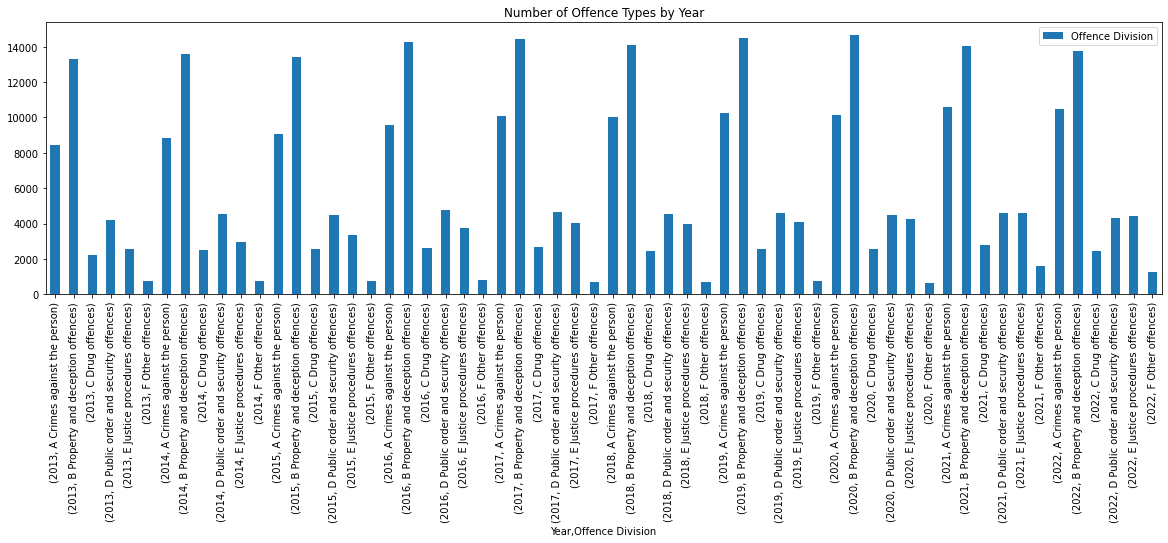

In [100]:
groups_of_crime_by_year.plot(kind='bar', figsize=(20,5), title="Number of Offence Types by Year")


In [101]:
#We observe that property and deception offences occur with the highest frequency

In [102]:
offence_subdivision_types = df1.groupby('Offence Division')['Offence Subdivision'].apply(lambda x: list(np.unique(x)))

In [103]:
offence_subdivision_types

Offence Division
A Crimes against the person             [A20 Assault and related offences, A50 Robbery...
B Property and deception offences       [B10 Arson, B20 Property damage, B30 Burglary/...
C Drug offences                         [C10 Drug dealing and trafficking, C20 Cultiva...
D Public order and security offences    [D10 Weapons and explosives offences, D20 Diso...
E Justice procedures offences            [E10 Justice procedures, E20 Breaches of orders]
F Other offences                        [F10 Regulatory driving offences, F20 Transpor...
Name: Offence Subdivision, dtype: object

In [104]:
offence_subdivision_types.value_counts()

[A20 Assault and related offences, A50 Robbery, A70 Stalking, harassment and threatening behaviour, A80 Dangerous and negligent acts endangering people, Other crimes against the person]    1
[B10 Arson, B20 Property damage, B30 Burglary/Break and enter, B40 Theft, B50 Deception, B60 Bribery]                                                                                        1
[C10 Drug dealing and trafficking, C20 Cultivate or manufacture drugs, C30 Drug use and possession, C90 Other drug offences]                                                                 1
[D10 Weapons and explosives offences, D20 Disorderly and offensive conduct, D30 Public nuisance offences, D40 Public security offences]                                                      1
[E10 Justice procedures, E20 Breaches of orders]                                                                                                                                             1
[F10 Regulatory driving offences, F20 Transpo

In [105]:
#we observe a fairly even distribution across all the years 

In [106]:
df1.isnull().sum()

Year                     0
Year ending              0
Local Government Area    0
Postcode                 0
Suburb/Town Name         0
Offence Division         0
Offence Subdivision      0
Offence Subgroup         0
Offence Count            0
dtype: int64

In [ ]:
#we can see there are no missing values in both our dataframes 

In [107]:
#visualise the offence count per year
offence_count_by_year= df1.groupby('Year')['Offence Count'].sum()

In [108]:
offence_count_by_year = offence_count_by_year.to_frame()


In [109]:
offence_count_by_year = offence_count_by_year.reset_index()

In [110]:
offence_count_by_year

,Year,Offence Count
0,2013,416824
1,2014,450811
2,2015,459417
3,2016,520102
4,2017,540248
5,2018,499435
6,2019,511440
7,2020,539180
8,2021,528400
9,2022,468330


<AxesSubplot:xlabel='Year', ylabel='Offence Count'>

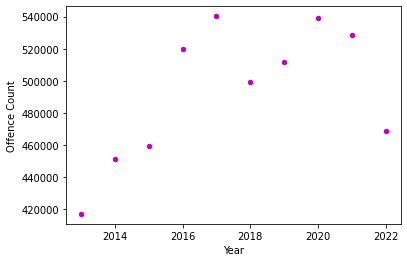

In [111]:
offence_count_by_year.plot.scatter(x='Year', y='Offence Count', c="m", s=20)


In [117]:
#we can see the number of offences has dropped in 2022
#but keep in mind the year isn't over yet so may not be an accurate representation 
#number of offences was at its peak in 2017 and lowest in 2013

In [166]:
#visualise the offence count per LGA

In [167]:
offence_count_by_LGA = df1.groupby('Local Government Area')['Offence Count'].sum().sort_values(ascending=False)

In [203]:
type(offence_count_by_LGA)

pandas.core.series.Series

In [174]:
offence_count_by_LGA.head(30)

Local Government Area
Melbourne               351636
Greater Geelong         203778
Casey                   201795
Hume                    195972
Brimbank                186205
Greater Dandenong       178345
Wyndham                 148472
Whittlesea              146574
Frankston               144621
Darebin                 143433
Moreland                132432
Yarra                   128343
Latrobe                 126933
Port Phillip            124216
Melton                  111755
Monash                  107758
Ballarat                107378
Kingston                105890
Knox                    105766
Mornington Peninsula    105318
Stonnington             104457
Greater Bendigo          97719
Banyule                  90321
Maribyrnong              86610
Moonee Valley            85556
Whitehorse               80721
Greater Shepparton       79949
Yarra Ranges             78451
Maroondah                78295
Boroondara               74372
Name: Offence Count, dtype: int64

In [175]:
offence_count_by_LGA.tail(30)

Local Government Area
Moorabool             21699
Moira                 18935
Colac-Otway           16324
Glenelg               15939
South Gippsland       14735
Surf Coast            13177
Ararat                12979
Benalla               12630
Central Goldfields    12353
Southern Grampians    11939
Northern Grampians    11801
Mount Alexander        9985
Corangamite            7894
Hepburn                7362
Murrindindi            7345
Gannawarra             6740
Moyne                  6334
Golden Plains          6330
Strathbogie            5826
Indigo                 5090
Alpine                 4964
Pyrenees               4893
Mansfield              4892
Loddon                 4630
Yarriambiack           4324
Hindmarsh              3430
Buloke                 2737
Towong                 2217
West Wimmera           1739
Queenscliffe           1440
Name: Offence Count, dtype: int64

<AxesSubplot:title={'center':'Number of Offences by LGA'}, xlabel='Local Government Area'>

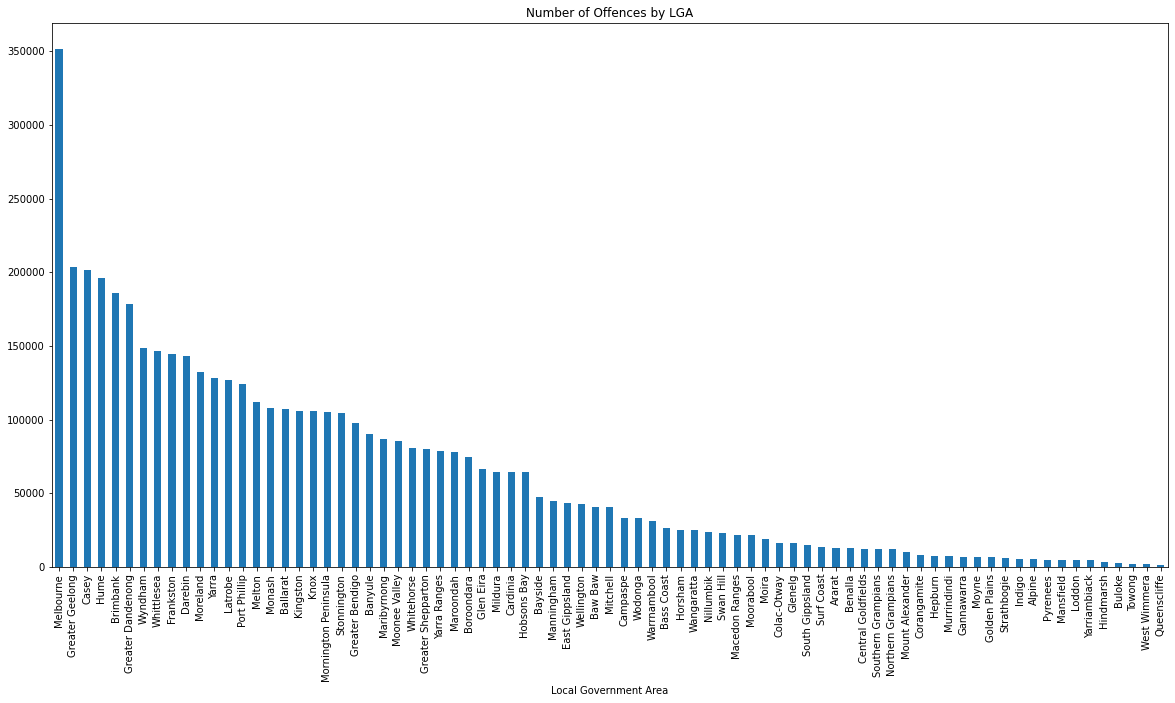

In [179]:
offence_count_by_LGA.plot(kind='bar', figsize=(20,10), title="Number of Offences by LGA")

In [ ]:
#Now let's observe the number of offences by suburb 

In [180]:
offence_count_by_suburb = df1.groupby('Suburb/Town Name')['Offence Count'].sum().sort_values(ascending=False)

In [184]:
#top 30
offence_count_by_suburb.head(30)

Suburb/Town Name
Melbourne           218210
Frankston            75538
Dandenong            75035
Shepparton           55422
Preston              52240
Mildura              51470
St Kilda             44253
Reservoir            44109
Werribee             42858
Morwell              42345
Richmond             40637
Traralgon            39968
Pakenham             38548
St Albans            38495
Broadmeadows         35372
Craigieburn          35092
Epping               33013
Southbank            32573
Geelong              31309
Hoppers Crossing     30973
Ringwood             30952
Sunshine             30852
Warrnambool          30310
Bendigo              29086
Cranbourne           28974
Ballarat Central     28936
Narre Warren         28759
Footscray            28102
Brunswick            27198
Sunbury              26729
Name: Offence Count, dtype: int64

In [205]:
#to do: map with shapefile for code by suburb 
#remove outliers
#decide on some metric for crime 